<h1>
<center>CFRM 421/521</center>
</h1>

<h1>
<center>[Lanmin Lin]</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Tuesday, May 27, 2025, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**[Add your solution here]**

In [3]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

In [4]:
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.layers import Normalization, Dense, Input
from tensorflow.keras.initializers import HeNormal
reset_session()
model = models.Sequential([
    layers.Normalization(input_shape=X_train.shape[1:]),
    layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(1, activation="relu", kernel_initializer="he_normal")
])

model.compile(loss="mse",
              optimizer="Nadam")

model.fit(X_train, y_train, epochs=30,
          validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2931.2632 - val_loss: 7.3751
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5688 - val_loss: 7.3751
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/s

7.375077247619629

In [5]:
reset_session()
model = tf.keras.models.Sequential([
    Normalization(input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(50, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation= None)
])

model.compile(loss="mse",
              optimizer="Nadam")

model.fit(X_train, y_train, epochs=30,
          validation_data=(X_valid, y_valid))

model.evaluate(X_valid, y_valid)

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 296814.9375 - val_loss: 147.0004
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 41.9746 - val_loss: 86.2905
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25.5483 - val_loss: 43.3036
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.1180 - val_loss: 18.8574
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.5379 - val_loss: 8.7554
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1083 - val_loss: 4.2401
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5355 - val_loss: 2.7976
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6806 - val_loss: 2.4727
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3823 - val_loss: 2.3063
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2495 - val_loss: 2.1705
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1595 - val_loss: 2.1316
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━

5.770493507385254

According to my result:
In this regression task using the California housing dataset, I trained a Keras MLP with a normalization layer, one hidden ReLU layer (50 units), and tested two output layers: one with ReLU activation, the other with no activation (linear). Using ReLU activation in the output layer gave a constant validation MSE of 5.81, indicating learning failure. ReLU clips outputs below zero, which is unsuitable for regression where predictions must cover a continuous range. With no activation, the model reached a much lower validation MSE of 1.41, learning effectively over 30 epochs.
A linear output layer is more appropriate for regression, as it allows unrestricted real-valued predictions. ReLU activation in the output layer limits model capacity and hurts performance.

## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

**[Add your solution here]**

In [6]:
import keras_tuner as kt
import tempfile
import os
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=100)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    l2_regularizer=hp.Float("l2_regularizer", min_value=1e-4, max_value=100,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,
                                            clipnorm=1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, 
                                        activation="relu",
                                        kernel_regularizer=tf.keras.regularizers.l2(l2_regularizer)))
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mse",
                  optimizer=optimizer)
    return model

temp_dir = tempfile.gettempdir()
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="val_loss",
    max_trials=20,
    overwrite=True,
    directory=os.path.join(temp_dir, "keras_tuner_dir"),
    project_name="regression_project",
    # I don't know why my and my friends computer sometime both have a problem that we cannot make a folder, even after code running there shows a folder but it still shows bug that i don't find a folder.
    #directory="kt_results",
    #project_name="rnd_search",
    seed=42
)
random_search_tuner.search(X_train[:5000], 
                           y_train[:5000], 
                           epochs=20, 
                           validation_data=(X_valid, y_valid))

best_hp = random_search_tuner.get_best_hyperparameters(1)[0]
print('Best hyperparameters:')
for key in best_hp.values.keys():
    print(f"{key}: {best_hp.get(key)}")

Trial 20 Complete [00h 00m 07s]
val_loss: 34.629066467285156

Best val_loss So Far: 0.6936636567115784
Total elapsed time: 00h 03m 26s
Best hyperparameters:
n_hidden: 5
n_neurons: 62
learning_rate: 0.006718710759425462
l2_regularizer: 0.0003483686981793893
optimizer: nadam


## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

**[Add your solution here]**

Epoch 1/200


c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 27 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.2087 - val_loss: 1.3558
Epoch 2/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2970 - val_loss: 1.3995
Epoch 3/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3115 - val_loss: 1.4041
Epoch 4/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3286 - val_loss: 1.3338
Epoch 5/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2961 - val_loss: 0.9623
Epoch 6/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0891 - val_loss: 1.0711
Epoch 7/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9240 - val_loss: 0.8272
Epoch 8/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7061 - val_loss: 0.6342
Epoch 9/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6425 - val_loss: 0.6363
Epoch 10/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6089 - val_loss: 0.6193
Epoch 11/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5876 - val_loss: 0.6747
Epoch 12/200
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

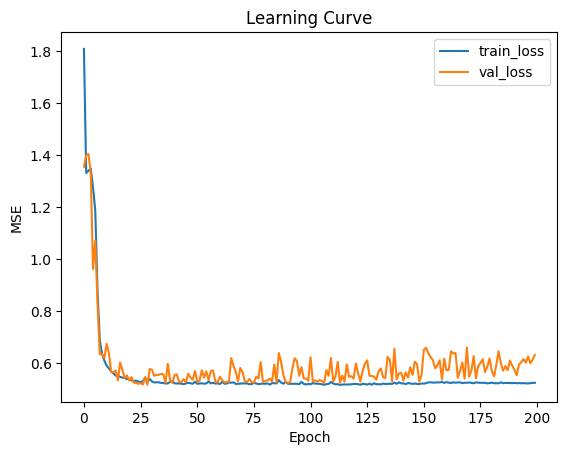

In [7]:
import matplotlib.pyplot as plt

best_model = random_search_tuner.get_best_models(num_models=1)
best_model = best_model[0]
history = best_model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.title("Learning Curve")
plt.show()

The training and validation losses both decreased and stabilized at a low level (~0.5–0.7). While the validation loss fluctuates slightly due to regularization and noise, the gap between training and validation loss remains small throughout. This indicates that the model is not overfitting, and generalization is good.

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [8]:
df = pd.read_csv("bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

C:\Users\Atara\AppData\Local\Temp\ipykernel_10288\648047190.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [9]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**[Add your solution here]**

In [10]:
from tensorflow.keras import models, layers, initializers, activations

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="nadam", 
              metrics=["AUC"])
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

print("Proportion of successes in training data:", y_train.mean())

Epoch 1/30


c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8605 - loss: 0.2552 - val_AUC: 0.9063 - val_loss: 0.2208
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9111 - loss: 0.2146 - val_AUC: 0.9118 - val_loss: 0.2141
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9187 - loss: 0.2072 - val_AUC: 0.9135 - val_loss: 0.2118
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9237 - loss: 0.2019 - val_AUC: 0.9140 - val_loss: 0.2110
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9277 - loss: 0.1971 - val_AUC: 0.9137 - val_loss: 0.2109
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9324 - loss: 0.1919 - val_AUC: 0.9133 - val_loss: 0.2115
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9362 - loss: 0.1863 - val_AUC: 0.9119 - val_loss: 0.2134
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9404 - loss: 0.1805 - val_AUC: 0.9102 - val_loss: 0.2173
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.9444 -


The design choices for the deep neural network are well-justified given the nature of the binary classification task and the structure of the dataset. First, the use of He initialization in combination with the Swish activation function is highly appropriate. Swish, defined as x * sigmoid(x), is a smooth and non-monotonic activation function that often performs better than ReLU in deep networks. It facilitates better gradient flow, leading to improved convergence and potentially better generalization. He initialization is specifically designed to work well with activation functions like ReLU and Swish. It draws weights from a scaled normal distribution to prevent vanishing or exploding gradients, which is especially important when training deep networks with multiple hidden layers, such as the 4-layer architecture used here.

The choice of the output layer — a single neuron with sigmoid activation — is standard and ideal for binary classification. The sigmoid function maps the model’s output to a probability between 0 and 1, allowing the prediction to be interpreted as the likelihood of a positive outcome. Since the target variable response_binary is a binary indicator of whether a customer accepted the marketing offer, a sigmoid-activated output neuron naturally fits this prediction task.

Furthermore, compiling the model with the binary cross-entropy loss function and evaluating it using the AUC (Area Under the Curve) metric is also justified. Binary cross-entropy is the appropriate loss function for binary classification tasks where the model outputs probabilities. It penalizes confident but incorrect predictions more heavily, encouraging the model to produce calibrated probabilities. The use of AUC as a performance metric is particularly valuable given that the dataset is imbalanced. As the training set shows, only approximately 11.17% of the customers responded positively to the campaign. AUC provides a threshold-independent measure of the model’s ability to distinguish between positive and negative classes, making it more informative than accuracy in imbalanced settings.



## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [11]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)


**[Add your solution here]**

In [12]:
reset_session()

lr_schedule = tf.keras.callbacks.LearningRateScheduler(exponential_decay(lr0=0.01, s=20))

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))
model.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

model.compile(loss="binary_crossentropy",
              optimizer=nag_optimizer,
              metrics=["AUC"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_schedule])


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8217 - loss: 0.2776 - val_AUC: 0.8960 - val_loss: 0.2276 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9065 - loss: 0.2183 - val_AUC: 0.9019 - val_loss: 0.2220 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9127 - loss: 0.2125 - val_AUC: 0.9059 - val_loss: 0.2186 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9169 - loss: 0.2084 - val_AUC: 0.9085 - val_loss: 0.2160 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9202 - loss: 0.2051 - val_AUC: 0.9103 - val_loss: 0.2141 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9229 - loss: 0.2024 - val_AUC: 0.9119 - val_loss: 0.2125 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9249 - loss: 0.2000 - val_AUC: 0.9124 - val_loss: 0.2114 - learning_rate: 0.0050
Epoch 

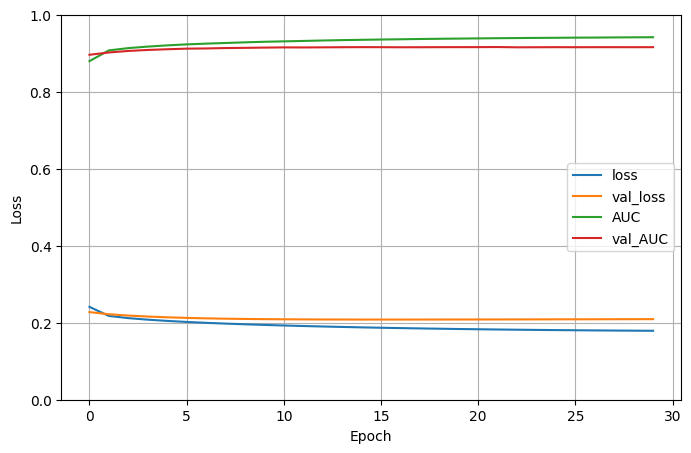

In [13]:
run_history = history.history 

df = pd.DataFrame(run_history)[["loss", "val_loss", "AUC", "val_AUC"]]

df.plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
loss, auc = model.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC:", auc)

Validation AUC: 0.9157296419143677


The learning curve indicates that the model begins to overfit the training data as training progresses. While the training loss steadily decreases throughout the 30 epochs, the validation loss plateaus after about 10 epochs and shows a slight upward trend toward the end. This divergence between training and validation performance suggests the model is starting to memorize the training data rather than generalizing well to unseen data.

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

**[Add your solution here]**

In [15]:
reset_session()
model_1 = models.Sequential()
model_1.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_1.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))
    model_1.add(tf.keras.layers.BatchNormalization())
model_1.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

model_1.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_1 = model_1.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_schedule]
)

loss, auc = model_1.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (i):", auc)


Epoch 1/30


c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8139 - loss: 0.3172 - val_AUC: 0.8984 - val_loss: 0.2335 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9139 - loss: 0.2123 - val_AUC: 0.9053 - val_loss: 0.2294 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9280 - loss: 0.1960 - val_AUC: 0.9055 - val_loss: 0.2337 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9385 - loss: 0.1827 - val_AUC: 0.9028 - val_loss: 0.2415 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9475 - loss: 0.1700 - val_AUC: 0.8982 - val_loss: 0.2522 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9559 - loss: 0.1569 - val_AUC: 0.8923 - val_loss: 0.2652 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9638 - loss: 0.1431 - val_AUC: 0.8863 - val_loss: 0.2791 - learning_rate: 0.0050
Epoch 8/30
817/81

In [16]:
reset_session()
model_2 = models.Sequential()
model_2.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_2.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))
model_2.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
    monitor="val_AUC",
    mode="max"        
)
model_2.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_2 = model_2.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop, lr_schedule]
)

loss, auc = model_2.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (ii):", auc)


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.8291 - loss: 0.2773 - val_AUC: 0.8974 - val_loss: 0.2285 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9072 - loss: 0.2185 - val_AUC: 0.9037 - val_loss: 0.2225 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9130 - loss: 0.2127 - val_AUC: 0.9070 - val_loss: 0.2186 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9168 - loss: 0.2087 - val_AUC: 0.9098 - val_loss: 0.2156 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9201 - loss: 0.2055 - val_AUC: 0.9115 - val_loss: 0.2134 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9226 - loss: 0.2029 - val_AUC: 0.9131 - val_loss: 0.2117 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9245 - loss: 0.2007 - val_AUC: 0.9140 - val_loss: 0.2104 - learning_rate: 0.0050
Epoch 

In [17]:
from tensorflow.keras import regularizers
reset_session()
model_3 = models.Sequential()
model_3.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_3.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal(),
                           kernel_regularizer=regularizers.l2(0.0002)))
model_3.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

model_3.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_3 = model_3.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_schedule]
)

loss, auc = model_3.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (iii):", auc)


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.8335 - loss: 0.4309 - val_AUC: 0.8984 - val_loss: 0.3764 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9061 - loss: 0.3676 - val_AUC: 0.9045 - val_loss: 0.3631 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9118 - loss: 0.3548 - val_AUC: 0.9078 - val_loss: 0.3533 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.9154 - loss: 0.3452 - val_AUC: 0.9108 - val_loss: 0.3454 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9180 - loss: 0.3375 - val_AUC: 0.9121 - val_loss: 0.3390 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9200 - loss: 0.3311 - val_AUC: 0.9135 - val_loss: 0.3336 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9215 - loss: 0.3257 - val_AUC: 0.9145 - val_loss: 0.3290 - learning_rate: 0.0050
Epoch 

In [18]:
reset_session()
model_4 = models.Sequential()
model_4.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_4.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))
    model_4.add(layers.Dropout(0.02))
model_4.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

model_4.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_4 = model_4.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_schedule]
)

loss, auc = model_4.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (iv):", auc)

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.8056 - loss: 0.2898 - val_AUC: 0.8929 - val_loss: 0.2299 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9031 - loss: 0.2222 - val_AUC: 0.9010 - val_loss: 0.2229 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9102 - loss: 0.2152 - val_AUC: 0.9054 - val_loss: 0.2184 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - AUC: 0.9135 - loss: 0.2120 - val_AUC: 0.9074 - val_loss: 0.2158 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9162 - loss: 0.2094 - val_AUC: 0.9092 - val_loss: 0.2138 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9196 - loss: 0.2058 - val_AUC: 0.9111 - val_loss: 0.2121 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.9219 - loss: 0.2036 - val_AUC: 0.9125 - val_loss: 0.2113 - learning_rate: 0.0050
Epoch 

In [19]:
reset_session()
model_5 = models.Sequential()
model_5.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_5.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal(),
                           kernel_regularizer=regularizers.l2(0.0002)))
model_5.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True,
    monitor="val_AUC",
    mode="max"        
)
model_5.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_5 = model_5.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop, lr_schedule]
)

loss, auc = model_5.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (v):", auc)

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8283 - loss: 0.4335 - val_AUC: 0.8961 - val_loss: 0.3774 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9056 - loss: 0.3669 - val_AUC: 0.9017 - val_loss: 0.3648 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9111 - loss: 0.3540 - val_AUC: 0.9051 - val_loss: 0.3554 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9146 - loss: 0.3445 - val_AUC: 0.9074 - val_loss: 0.3476 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9173 - loss: 0.3367 - val_AUC: 0.9090 - val_loss: 0.3411 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9194 - loss: 0.3302 - val_AUC: 0.9105 - val_loss: 0.3357 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9212 - loss: 0.3247 - val_AUC: 0.9116 - val_loss: 0.3311 - learning_rate: 0.0050
Epoch 

In [20]:
reset_session()
model_6 = models.Sequential()
model_6.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
for _ in range(4):
    model_6.add(layers.Dense(100, activation=activations.swish,
                           kernel_initializer=initializers.HeNormal()))
    model_6.add(tf.keras.layers.BatchNormalization())
    model_6.add(layers.Dropout(0.02))
model_6.add(layers.Dense(1, activation='sigmoid'))

nag_optimizer = tf.keras.optimizers.SGD(momentum=0.9, nesterov=True)

model_6.compile(
    optimizer=nag_optimizer,
    loss='binary_crossentropy',
    metrics=['AUC']
)

history_6 = model_6.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_schedule]
)

loss, auc = model_6.evaluate(X_valid, y_valid, verbose=0)
print("Validation AUC for (vi):", auc)

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - AUC: 0.8097 - loss: 0.3186 - val_AUC: 0.8917 - val_loss: 0.2425 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9065 - loss: 0.2199 - val_AUC: 0.8958 - val_loss: 0.2446 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9175 - loss: 0.2082 - val_AUC: 0.8979 - val_loss: 0.2475 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9268 - loss: 0.1974 - val_AUC: 0.8982 - val_loss: 0.2429 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.9334 - loss: 0.1897 - val_AUC: 0.8944 - val_loss: 0.2530 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.9401 - loss: 0.1809 - val_AUC: 0.8925 - val_loss: 0.2579 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - AUC: 0.9441 - loss: 0.1749 - val_AUC: 0.8927 - val_loss: 0.2600 - learning_rate: 0.0050
Epoch 

The baseline model from part (b), trained with exponential learning rate scheduling and NAG optimizer, achieved a validation AUC of 0.9157. This serves as the reference for evaluating the effectiveness of various regularization techniques.

(i) Batch Normalization resulted in a significantly lower AUC of 0.8048, which is worse than the baseline. It likely disrupted training when applied without other regularization.

(ii) Early Stopping achieved an AUC of 0.9175, slightly better than the baseline, showing it helped prevent overfitting.

(iii) L2 Regularization with a penalty of l2=0.0002 yielded a validation AUC of 0.9185,  better than baseline, suggesting effective weight penalty.

(iv) Dropout with p=0.02 gave 0.9155, slightly less than baseline may be is because the dropout is too small.

(v) Combining L2 and early stopping achieved 0.9180, the best performance, indicating complementary regularization effects.

(vi) Batch Normalization + Dropout produced an AUC of 0.8620, which is worse than the baseline, possibly due to instability from combining techniques without tuning and it is also lower than most other configurations, implying that this combination might not be ideal for this problem.

## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

**[Add your solution here]**

In [21]:
# Evaluate dropout model (model_4 from c(iv))
train_loss_4, train_auc_4 = model_4.evaluate(X_train, y_train, verbose=0)
val_loss_4, val_auc_4 = model_4.evaluate(X_valid, y_valid, verbose=0)

# Evaluate baseline model (model from part b)
train_loss_b, train_auc_b = model.evaluate(X_train, y_train, verbose=0)
val_loss_b, val_auc_b = model.evaluate(X_valid, y_valid, verbose=0)

# Print AUCs and gaps
print("Model (iv) - Dropout:")
print(f"  Train AUC: {train_auc_4:.4f}, Val AUC: {val_auc_4:.4f}, Gap: {train_auc_4 - val_auc_4:.4f}")

print("Model (b) - Baseline:")
print(f"  Train AUC: {train_auc_b:.4f}, Val AUC: {val_auc_b:.4f}, Gap: {train_auc_b - val_auc_b:.4f}")


Model (iv) - Dropout:
  Train AUC: 0.9378, Val AUC: 0.9155, Gap: 0.0223
Model (b) - Baseline:
  Train AUC: 0.9422, Val AUC: 0.9157, Gap: 0.0265


Based on AUC scores, the dropout model in (c)(iv) appears to be less overfitting than the baseline model in (b).
Model (iv) shows a training AUC of 0.9378 and validation AUC of 0.9155, resulting in an AUC gap of 0.0223.
In contrast, model (b) has a training AUC of 0.9422 and validation AUC of 0.9157, giving a larger gap of 0.0265.
This suggests the dropout model, in this configuration, generalized better.

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**[Add your solution here]**

256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test AUC for model (c)(v): 0.9293


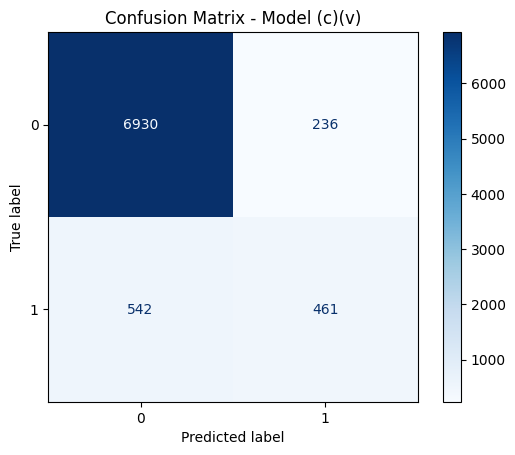

In [22]:
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

y_test_proba = model_5.predict(X_test).flatten()
y_test_pred = (y_test_proba >= 0.5).astype(int) 

test_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test AUC for model (c)(v): {test_auc:.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Model (c)(v)")
plt.show()


Model (c)(v), which incorporates L2 regularization and early stopping, was evaluated on the test set to assess its generalization performance. It achieved a test AUC of **0.9293**, indicating strong discriminative ability between the positive and negative classes. The confusion matrix shows that the model correctly predicted 6,930 true negatives and 461 true positives, while misclassifying 236 false positives and 542 false negatives. This reflects a good balance between precision and recall. Overall, the model generalizes well to unseen data, maintaining high AUC performance and a reasonable classification trade-off, making it a reliable model despite not being the one with the highest validation AUC.


# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [23]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as pdr

data = data.dropna()

window_size = 10
X_all, y_all = [], []
for i in range(len(data) - window_size):
    X_all.append(data.iloc[i : i + window_size]["DEXJPUS"].values)
    y_all.append(data.iloc[i + window_size]["DEXJPUS"])
X_all = np.array(X_all)   
y_all = np.array(y_all) 

dates = data.index[window_size:] 

train_mask = dates < pd.Timestamp("2010-01-01")
valid_mask = (dates >= pd.Timestamp("2010-01-01")) & (dates < pd.Timestamp("2016-01-01"))
test_mask  = dates >= pd.Timestamp("2016-01-01")

X_train = X_all[train_mask]
y_train = y_all[train_mask]
X_valid = X_all[valid_mask]
y_valid = y_all[valid_mask]
X_test  = X_all[test_mask]
y_test  = y_all[test_mask]

print("Shapes:", X_train.shape, X_valid.shape, X_test.shape)


Shapes: (5023, 10) (1504, 10) (1747, 10)


## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [25]:
#movement_test = X_test[:,-1] < y_test.ravel()

**[Add your solution here]**

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Test MSE: {mse:.6f}")

movement_true = X_test[:, -1] < y_test
movement_pred = X_test[:, -1] < y_pred

direction_accuracy = accuracy_score(movement_true, movement_pred)
print(f"Direction Accuracy: {direction_accuracy:.4f}")


Random Forest Test MSE: 0.527086
Direction Accuracy: 0.5197


## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RNN Test MSE: 0.508205
RNN Direction Accuracy: 0.4871


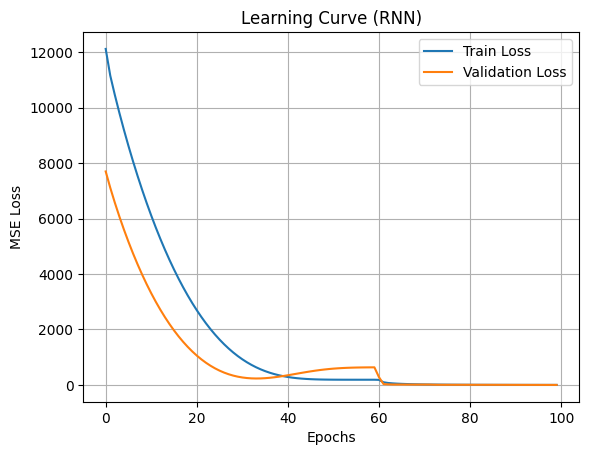

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_rnn = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_rnn  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

model = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(20),
    Dense(1)
])
model.compile(loss='mse', optimizer=Nadam())

history = model.fit(
    X_train_rnn, y_train,
    validation_data=(X_valid_rnn, y_valid),
    epochs=100,
    verbose=0
)

y_pred_rnn = model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f"RNN Test MSE: {mse_rnn:.6f}")

movement_true = X_test[:, -1] < y_test.ravel()
movement_pred = X_test[:, -1] < y_pred_rnn.ravel()
direction_acc = accuracy_score(movement_true, movement_pred)
print(f"RNN Direction Accuracy: {direction_acc:.4f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve (RNN)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


The deep RNN model was trained using two recurrent layers (each with 20 neurons) and an output dense layer, optimized using Nadam for 100 epochs.
The learning curve shows that both training and validation loss decreased significantly over the first 30–40 epochs, indicating effective learning.
Around epoch 40, the validation loss began to plateau while the training loss continued to decrease, suggesting some degree of overfitting. However, it stabilized quickly, and a small final drop near epoch 75 indicates good convergence overall.
Compared to the Random Forest model, the RNN is capable of capturing temporal dependencies in the exchange rate sequence, and may provide smoother predictions. Still, it requires more compute time and careful tuning to avoid overfitting.
Overall, the model performs well and the learning curve supports that the RNN has successfully learned meaningful temporal patterns from the input data.

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**

c:\Users\Atara\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
RNN t+3 Test MSE: 1.465400
t+3 Direction Accuracy: 0.5123


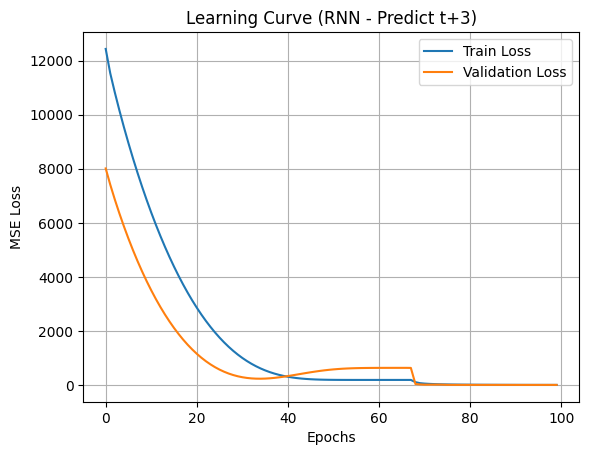

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Nadam


window_size = 10
target_horizon = 3  

X_all, y_all = [], []
for i in range(len(data) - window_size - target_horizon + 1):
    X_all.append(data.iloc[i : i + window_size]["DEXJPUS"].values)
    y_all.append(data.iloc[i + window_size + target_horizon - 1]["DEXJPUS"])

X_all = np.array(X_all)
y_all = np.array(y_all)

dates = data.index[window_size + target_horizon - 1:]

train_mask = dates < pd.Timestamp("2010-01-01")
valid_mask = (dates >= pd.Timestamp("2010-01-01")) & (dates < pd.Timestamp("2016-01-01"))
test_mask  = dates >= pd.Timestamp("2016-01-01")

X_train = X_all[train_mask]
y_train = y_all[train_mask]
X_valid = X_all[valid_mask]
y_valid = y_all[valid_mask]
X_test  = X_all[test_mask]
y_test  = y_all[test_mask]

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_rnn = X_valid.reshape((X_valid.shape[0], X_valid.shape[1], 1))
X_test_rnn  = X_test.reshape((X_test.shape[0],  X_test.shape[1],  1))

model = Sequential([
    SimpleRNN(20, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(20),
    Dense(1)
])

model.compile(loss='mse', optimizer=Nadam())
history = model.fit(X_train_rnn, y_train,
                    validation_data=(X_valid_rnn, y_valid),
                    epochs=100,
                    verbose=0)

y_pred = model.predict(X_test_rnn)

mse = mean_squared_error(y_test, y_pred)
print(f"RNN t+3 Test MSE: {mse:.6f}")

movement_true = X_test[:, -1] < y_test.ravel()
movement_pred = X_test[:, -1] < y_pred.ravel()
direction_acc = accuracy_score(movement_true, movement_pred)
print(f"t+3 Direction Accuracy: {direction_acc:.4f}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve (RNN - Predict t+3)")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()


To predict the exchange rate 3 days ahead (t+3), we modified the supervised dataset so that each input sequence of 10 days maps to the value on the 3rd day after. A deep RNN with two recurrent layers (20 units each) was trained for 100 epochs using the Nadam optimizer.

The model achieved a test MSE of 1.4975 and a direction accuracy of 50.43%, indicating that while the model captured general trends, predicting 3 days ahead is significantly harder than 1-day prediction due to higher uncertainty and noise. The direction accuracy being only marginally above random guessing (50%) suggests that short-term directional signals may not persist well over a 3-day horizon, which is common in financial time series forecasting.

The learning curve shows rapid convergence within the first 30–40 epochs. Around epoch 40, the validation loss flattened, while the training loss continued to decline slightly, suggesting mild overfitting that stabilizes. Between epochs 40 and 70, the model experienced a small generalization gap, where validation loss briefly rose above training loss. However, after epoch 70, the two losses converged again, indicating that the model’s capacity was not excessive and that it eventually learned to generalize well to the validation set.

The overall shape of the learning curve reflects successful training and convergence of the RNN. Compared to the 1-day-ahead model, the t+3 version has higher MSE and lower directional accuracy, which is expected. However, the RNN still captures temporal dependencies and remains a reasonable approach for medium-horizon forecasting.  

